# Examples for reading XMM-Newton spectra

In [58]:
import os
import io
import gzip
from zipfile import ZipFile

import numpy as np

%matplotlib inline
import matplotlib.pylab as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes

from astropy.io import fits
from astropy.convolution import convolve, Box1DKernel

In [3]:
#
# where the zip file with XMM spectra are
#
wdir = os.path.join(os.path.expanduser('~'),'esabox/Work/ESAC_ML_WS2019/xray_spectra')
maps_zip = f'{wdir}/xmm_spectra_select_fits.zip'
zipfile = ZipFile(maps_zip)

In [4]:
files = zipfile.namelist()
xfile = np.random.choice(files)
print (f"Will read {xfile}")

Will read spectra01_select/0501730101_spec01.fits.gz


In [5]:
f = zipfile.open(xfile)
hdu=fits.open(gzip.open(io.BytesIO(f.read())))
hdu.info()

Filename: <class '_io.BytesIO'>
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     119   ()      
  1  SPECTRUM      1 BinTableHDU     98   4096R x 4C   [I, J, I, I]   
  2  REGION        1 BinTableHDU     60   1R x 4C   [10A, E, E, E]   
  3  GTI00005      1 BinTableHDU     29   63R x 2C   [D, D]   
  4  GTI00105      1 BinTableHDU     29   63R x 2C   [D, D]   
  5  GTI00205      1 BinTableHDU     29   63R x 2C   [D, D]   
  6  GTI00305      1 BinTableHDU     29   63R x 2C   [D, D]   
  7  GTI00405      1 BinTableHDU     29   63R x 2C   [D, D]   
  8  GTI00505      1 BinTableHDU     29   63R x 2C   [D, D]   
  9  GTI00605      1 BinTableHDU     29   63R x 2C   [D, D]   
 10  GTI00705      1 BinTableHDU     29   63R x 2C   [D, D]   
 11  GTI00805      1 BinTableHDU     29   63R x 2C   [D, D]   
 12  GTI00905      1 BinTableHDU     29   64R x 2C   [D, D]   
 13  GTI01005      1 BinTableHDU     29   64R x 2C   [D, D]   
 14  GTI01105      1 

In [7]:
spec = hdu['SPECTRUM']
binsize = spec.header['SPECDELT']
x = spec.data['CHANNEL']*binsize/1000.0
y = spec.data['COUNTS']
#
# sum up the counts in [4,8] keV
#
ix = np.where((x<=8.0) & (x>=4.0))[0]
tot = np.sum(y[ix])
print (f'Total counts in spectrum {os.path.basename(xfile)} in [4,8] keV: {tot}')

Total counts in spectrum 0501730101_spec01.fits.gz in [4,8] keV: 1614


In [12]:
#
# smooth with a boxcar
#
boxsize=7
ysm = convolve(y, Box1DKernel(boxsize))

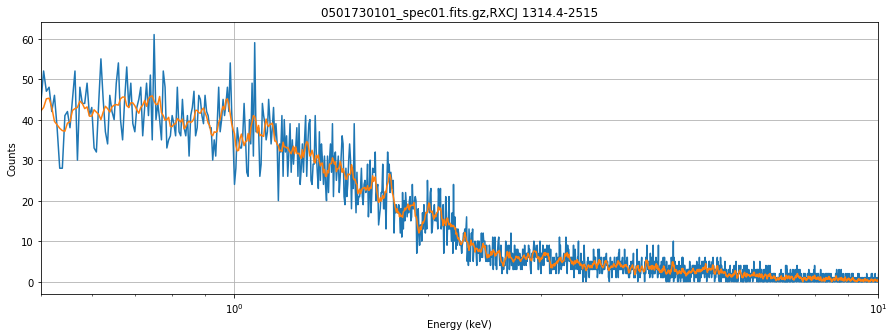

In [17]:
fig = plt.figure(figsize=(15,5))
ax = fig.subplots()
ax.semilogx(x,y)
ax.semilogx(x,ysm)
ax.set_xlabel("Energy (keV)")
ax.set_xlim((0.5,10))
ax.set_ylabel("Counts")
ax.set_title(f"{os.path.basename(xfile)}, {hdu[0].header['OBJECT']}")
ax.grid()

## Classification

An interesting project would be to classify the spectra in two classes, depending on the presence of the characteristic Fe K$_{\alpha}$ line at 6.4 keV.

We provide a couple of examples below:


In [92]:
obs_list = ["0310590201","0147920301","0145670101","0414580101","0761670601","0745060401","0414191101"]
nq = len(obs_list)

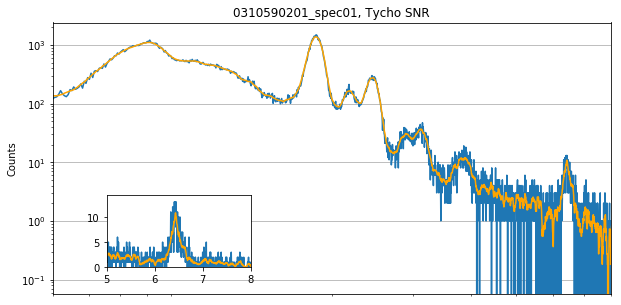

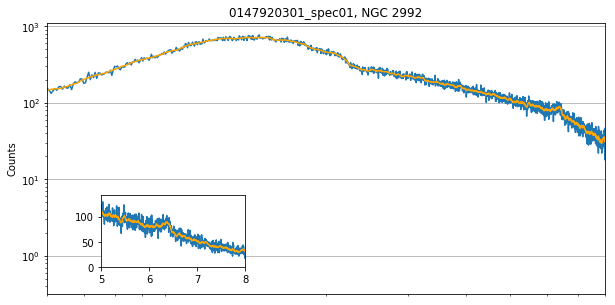

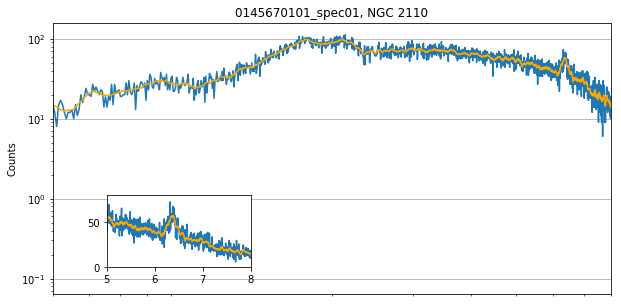

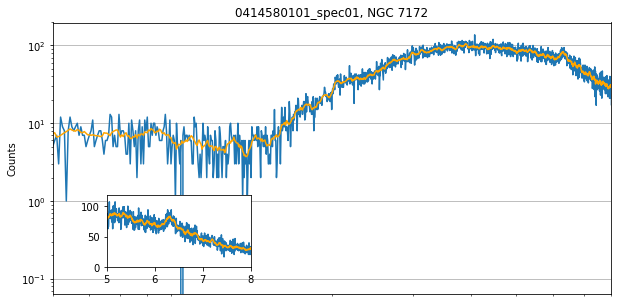

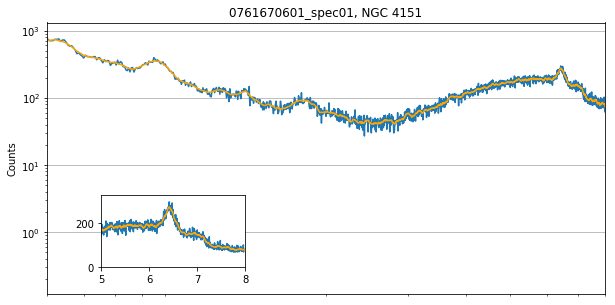

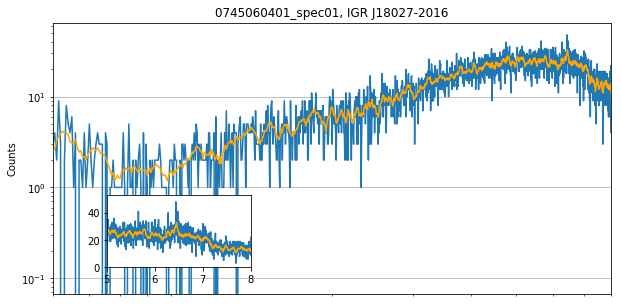

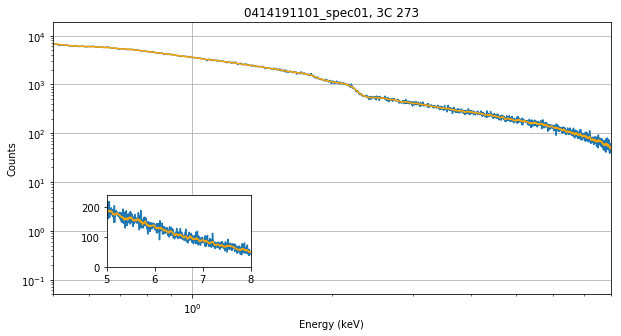

In [93]:
boxsize=11
for i in np.arange(nq):
    # find and read the file from the Zip list
    k = 1
    fig,ax = plt.subplots(figsize=(10,5))
    for ifile in files:
        if (obs_list[i] in ifile):
            f = zipfile.open(ifile)
            hdu=fits.open(gzip.open(io.BytesIO(f.read())))
            spec = hdu['SPECTRUM']
            binsize = spec.header['SPECDELT']
            x = spec.data['CHANNEL']*binsize/1000.0
            y = spec.data['COUNTS']
            #
            ysm = convolve(y, Box1DKernel(boxsize))
            #
            #axs[i].semilogx(x,y)
            #axs[i].semilogx(x,ysm)
            ax.loglog(x,y)
            ax.loglog(x,ysm,color='orange')
            #ax.axvline(6.4,linewidth=10,color='green',alpha=0.2)
            if (i == nq-1):
                ax.set_xlabel("Energy (keV)")
            else:
                ax.set_xlabel("")
                ax.set_xticks([])
            #axs[i].set_xlim((4,8))
            ax.set_xlim((0.5,8))
            #axs[i].set_ylim((1.0,1.0e3))
            ax.set_ylabel("Counts")
            ax.set_title(f"{os.path.basename(ifile).split('.')[0]}, {hdu[0].header['OBJECT']}")
            ax.grid()
            #
            # the inset
            #
            ax2 = fig.add_axes([0.2,0.2,0.2,0.2])
            ax2.plot(x,y)
            ax2.plot(x,ysm,color='orange')
            #
            ymax = np.max(y[np.where((x >= 5.0))[0]])
            ax2.set_xlim((5.0,8.0))
            ax2.set_ylim((0,ymax*1.1))
            #ax.fill_betweenx([0.01,ymax*1.5],5.0,8.0,color='green')

In [70]:
dir(axs[i])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_autotitlepos',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axisbelow',
 '_cachedRenderer',
 '_clipon',
 '_clippath',
 '_connected',
 '_contains',
 '_current_image',
 '_facecolor',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_get_axis_list',
 '_get_lines',
 '_get_patches_for_fill',
 '_get_view',
 '_gid',
 '_gridOn',
 '_hold',
 '_in_layout',
 '_init_axis',
 '_label',
 '_layoutbox',
 '_left_title',
 '_make_twin_axes',
 '_mouseover',
 '_m